In [649]:
# tylko nowe cechy
# liczba nowych cech to połowa oryginalnych cech
# sqrt(n) zaokrąglony w góre
# klasyfikatory - zafiksowac sensowne ustawienia
# wagi sumowane do 1
# lecim po wszystkich zbiorach czemu nie
# k-fold cross validation
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [650]:
datasets = load_datasets()

In [651]:
ds_name = 'new_led7digit'
test_on_all_folds = True
test_all_ds = False

In [652]:
dt_name_to_cols_to_encode = {
    'cmc': [1,2,6,7],
    'dermatology': list(range(0,10)) + list(range(10,33)),
    'hayes-roth':[0,1,2,3],
    'new_vehicle': [],
    'new_yeast': [5],
    '1czysty-cut': [],
    '2delikatne-cut': [],
    '3mocniej-cut': [],
    '4delikatne-bezover-cut': [],
    'balance-scale': [0,1,2,3],
    'cleveland': [2,6,10,11,12],
    'cleveland_v2': [2, 6, 10, 11, 12],
    'glass': [],
    'new_ecoli': [],
    'new_led7digit': [],
    'new_winequality-red': [],
    'thyroid-newthyroid': []
}

In [653]:
k = ds_name    
df = pd.DataFrame(data=datasets[k]['data'])
encoded = pd.get_dummies(df, columns=dt_name_to_cols_to_encode[ds_name], drop_first=True)

datasets[f"{k}_encoded"] = {'data': encoded.values, 'target': datasets[k]['target']}

ds_names = list(dt_name_to_cols_to_encode.keys())

if test_all_ds:
    for ds_name in ds_names:
        k = ds_name    
        df = pd.DataFrame(data=datasets[k]['data'])
        encoded = pd.get_dummies(df, columns=dt_name_to_cols_to_encode[ds_name], drop_first=True)

        datasets[f"{k}_encoded"] = {'data': encoded.values, 'target': datasets[k]['target']}

In [654]:
config = ex.config_calculation_strategy2(datasets)

In [655]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 200}

config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
   'units_2nd_layer': 512,
   'units_3rd_layer': 256,
   'units_latent_layer': 2},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 16,
  'gamma': 0.9,
  'epochs': 100}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 150}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.90,
 'epochs': 100}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 300,
  'units_3rd_layer': 200,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
  'units_2nd_layer': 72,
  'units_3rd_layer': 48,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 150}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.00001,
 'batch_size': 16,
 'gamma': 0.90,
 'epochs': 70}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.85,
 'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.0003,
 'batch_size': 16,
 'gamma': 0.85,
 'epochs': 70}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

In [656]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 'balance-scale': {'nn_config': {'un

In [657]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1)
        } 
    return classifiers

new_led7digit


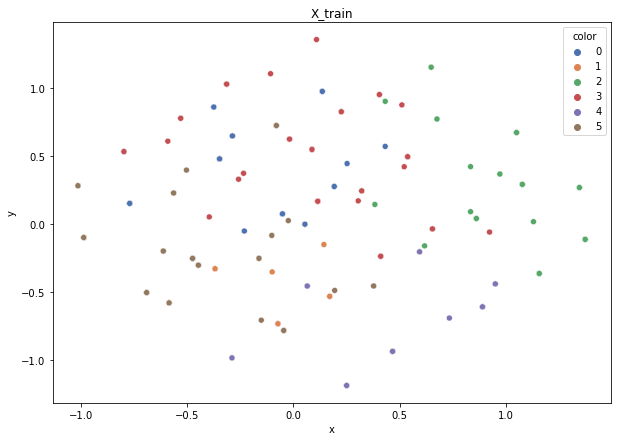

Class cardinalities: Counter({3: 87, 5: 79, 0: 78, 2: 75, 4: 41, 1: 40})
Weights: {0: 0.12859532399632337, 2: 0.1337391369561763, 3: 0.11529235944497956, 4: 0.24464476272471275, 5: 0.1269675350849775, 1: 0.25076088179283057}


100%|██████████| 100/100 [00:00<00:00, 3198.15it/s]


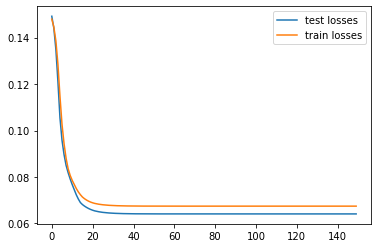

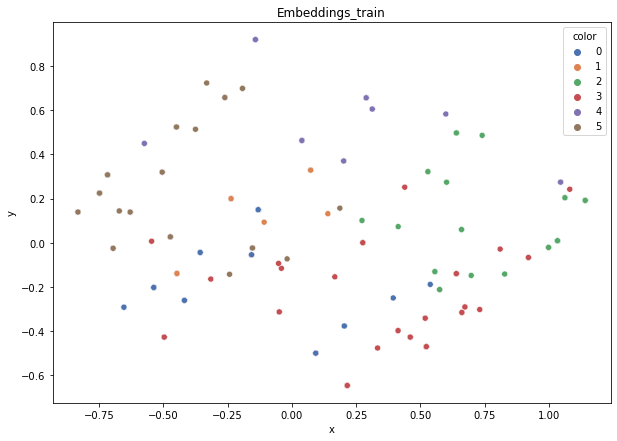

DT-f1-new-features: 0.774
DT-f1-old+new-features: 0.793
DT-f1-old-features: 0.789
DT-gmean-new-features: 0.776
DT-gmean-old+new-features: 0.806
DT-gmean-old-features: 0.797
KNN-f1-new-features: 0.693
KNN-f1-old+new-features: 0.782
KNN-f1-old-features: 0.674
KNN-gmean-new-features: 0.682
KNN-gmean-old+new-features: 0.776
KNN-gmean-old-features: 0.658
RF24-f1-new-features: 0.751
RF24-f1-old+new-features: 0.78
RF24-f1-old-features: 0.796
RF24-gmean-new-features: 0.738
RF24-gmean-old+new-features: 0.781
RF24-gmean-old-features: 0.797


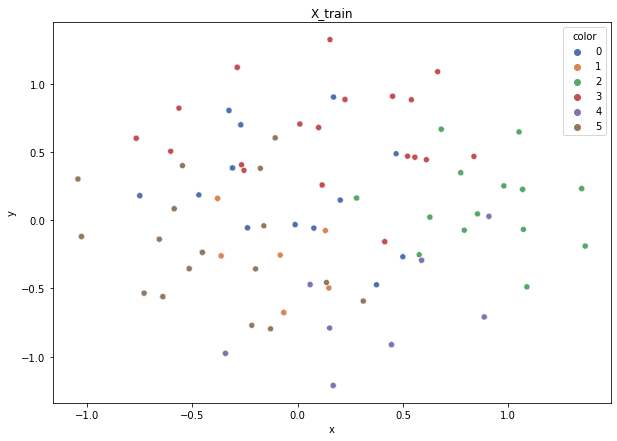

Class cardinalities: Counter({3: 87, 5: 80, 0: 78, 2: 75, 4: 41, 1: 39})
Weights: {0: 0.1279755802357915, 2: 0.13309460344522317, 3: 0.114736727107951, 4: 0.2434657380095546, 5: 0.12477619072989674, 1: 0.255951160471583}


100%|██████████| 100/100 [00:00<00:00, 2788.51it/s]


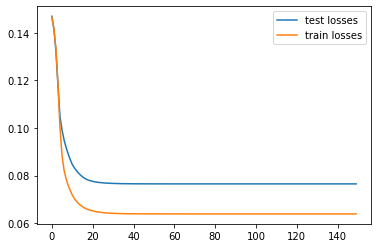

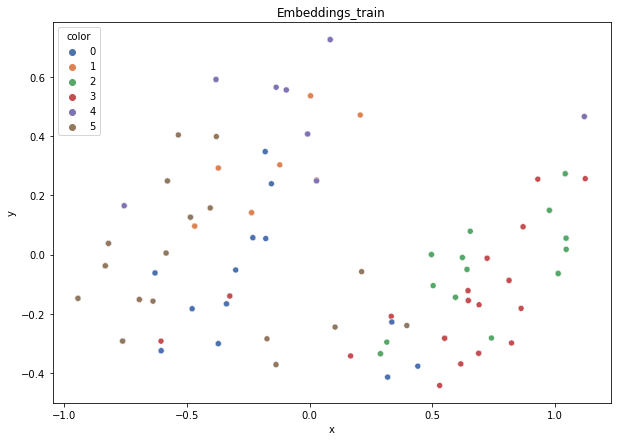

DT-f1-new-features: 0.725
DT-f1-old+new-features: 0.724
DT-f1-old-features: 0.779
DT-gmean-new-features: 0.697
DT-gmean-old+new-features: 0.697
DT-gmean-old-features: 0.755
KNN-f1-new-features: 0.67
KNN-f1-old+new-features: 0.736
KNN-f1-old-features: 0.592
KNN-gmean-new-features: 0.561
KNN-gmean-old+new-features: 0.706
KNN-gmean-old-features: 0.236
RF24-f1-new-features: 0.732
RF24-f1-old+new-features: 0.73
RF24-f1-old-features: 0.767
RF24-gmean-new-features: 0.691
RF24-gmean-old+new-features: 0.691
RF24-gmean-old-features: 0.735


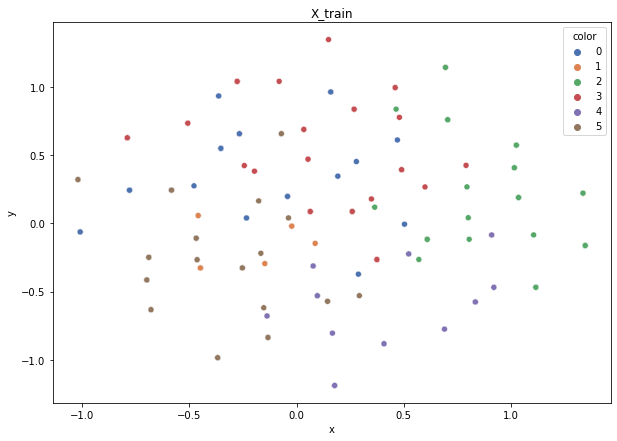

Class cardinalities: Counter({3: 86, 5: 79, 0: 78, 2: 76, 4: 42, 1: 39})
Weights: {0: 0.12857143873483481, 2: 0.1319548976489094, 3: 0.11661130489903622, 4: 0.23877552907897892, 5: 0.12694395216857107, 1: 0.25714287746966963}


100%|██████████| 100/100 [00:00<00:00, 2964.59it/s]


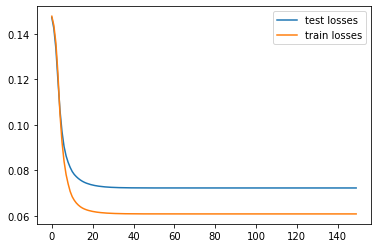

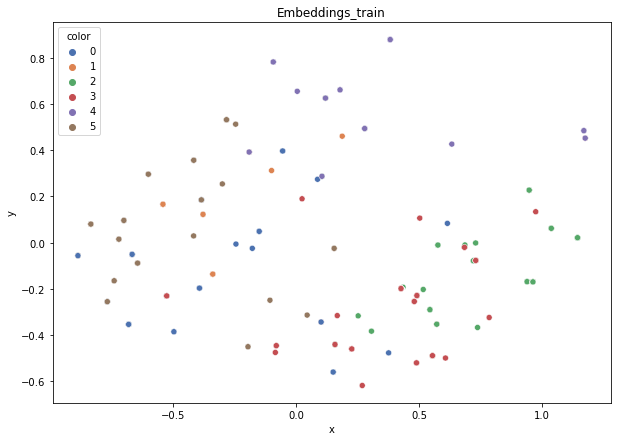

DT-f1-new-features: 0.774
DT-f1-old+new-features: 0.774
DT-f1-old-features: 0.782
DT-gmean-new-features: 0.776
DT-gmean-old+new-features: 0.776
DT-gmean-old-features: 0.783
KNN-f1-new-features: 0.7
KNN-f1-old+new-features: 0.767
KNN-f1-old-features: 0.768
KNN-gmean-new-features: 0.679
KNN-gmean-old+new-features: 0.762
KNN-gmean-old-features: 0.743
RF24-f1-new-features: 0.775
RF24-f1-old+new-features: 0.785
RF24-f1-old-features: 0.793
RF24-gmean-new-features: 0.776
RF24-gmean-old+new-features: 0.785
RF24-gmean-old-features: 0.793


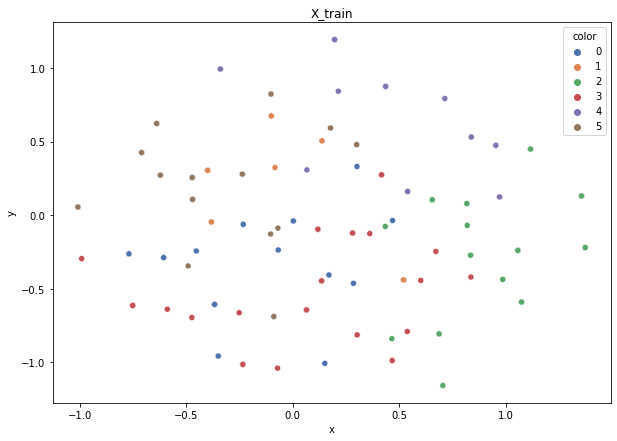

Class cardinalities: Counter({3: 86, 0: 79, 5: 79, 2: 75, 4: 42, 1: 39})
Weights: {0: 0.12692720893782067, 2: 0.13369666008117112, 3: 0.11659592448939342, 4: 0.23874403585923412, 5: 0.12692720893782067, 1: 0.2571089616945598}


100%|██████████| 100/100 [00:00<00:00, 2954.28it/s]


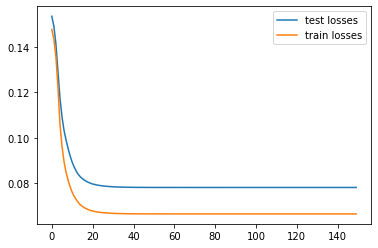

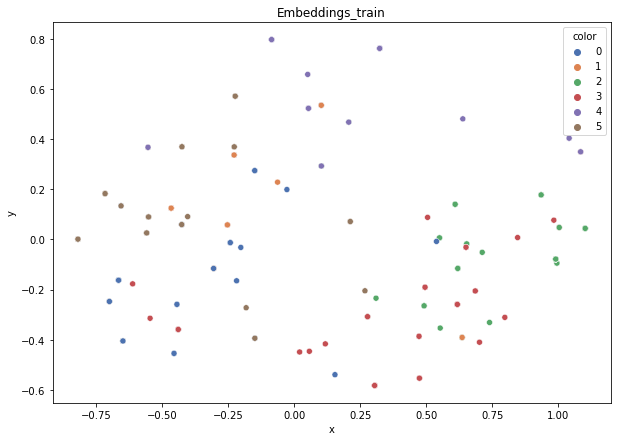

DT-f1-new-features: 0.732
DT-f1-old+new-features: 0.747
DT-f1-old-features: 0.716
DT-gmean-new-features: 0.719
DT-gmean-old+new-features: 0.739
DT-gmean-old-features: 0.698
KNN-f1-new-features: 0.735
KNN-f1-old+new-features: 0.594
KNN-f1-old-features: 0.615
KNN-gmean-new-features: 0.731
KNN-gmean-old+new-features: 0.52
KNN-gmean-old-features: 0.57
RF24-f1-new-features: 0.726
RF24-f1-old+new-features: 0.75
RF24-f1-old-features: 0.763
RF24-gmean-new-features: 0.705
RF24-gmean-old+new-features: 0.726
RF24-gmean-old-features: 0.751


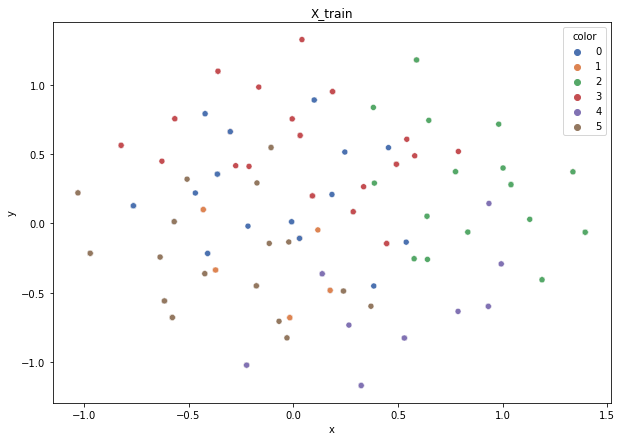

Class cardinalities: Counter({3: 86, 0: 79, 5: 79, 2: 75, 4: 42, 1: 39})
Weights: {0: 0.12692720893782067, 2: 0.13369666008117112, 3: 0.11659592448939342, 4: 0.23874403585923412, 5: 0.12692720893782067, 1: 0.2571089616945598}


100%|██████████| 100/100 [00:00<00:00, 3128.35it/s]


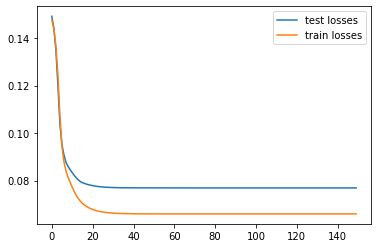

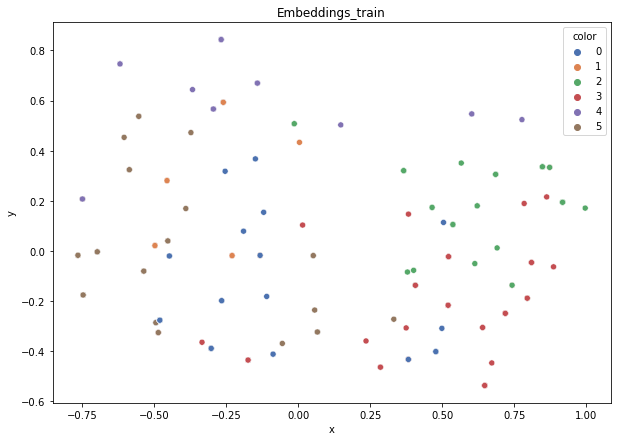

DT-f1-new-features: 0.784
DT-f1-old+new-features: 0.793
DT-f1-old-features: 0.802
DT-gmean-new-features: 0.788
DT-gmean-old+new-features: 0.797
DT-gmean-old-features: 0.806
KNN-f1-new-features: 0.749
KNN-f1-old+new-features: 0.832
KNN-f1-old-features: 0.718
KNN-gmean-new-features: 0.738
KNN-gmean-old+new-features: 0.84
KNN-gmean-old-features: 0.719
RF24-f1-new-features: 0.789
RF24-f1-old+new-features: 0.802
RF24-f1-old-features: 0.802
RF24-gmean-new-features: 0.788
RF24-gmean-old+new-features: 0.806
RF24-gmean-old-features: 0.806


In [658]:
result_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        
        # PCA X_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(X_train), y_train)
        plt.title("X_train")
        plt.show()
        
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg)
        
        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()
        
        X_train_new = np.hstack([X_train, embeddings_train])
        X_test_new = np.hstack([X_test, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))

In [659]:
results_df = pd.DataFrame.from_dict(result_dict)

In [660]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,KNN-f1-old-features,KNN-gmean-old-features,RF24-f1-old+new-features,RF24-gmean-old+new-features,DT-f1-old+new-features,DT-gmean-old+new-features,KNN-f1-old+new-features,KNN-gmean-old+new-features,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features,KNN-f1-new-features,KNN-gmean-new-features
0,new_led7digit,0.784222,0.776312,0.77366,0.768158,0.673437,0.58522,0.769335,0.757872,0.766282,0.763057,0.742287,0.720872,0.754449,0.739452,0.757732,0.75123,0.709382,0.67821


In [661]:
results_df.filter(regex=("dataset|RF24-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,new_led7digit,0.784222,0.769335,0.754449


In [662]:
results_df.filter(regex=("dataset|RF24-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,new_led7digit,0.776312,0.757872,0.739452


In [663]:
results_df.filter(regex=("dataset|DT-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,new_led7digit,0.773660,0.766282,0.757732


In [664]:
results_df.filter(regex=("dataset|DT-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,new_led7digit,0.768158,0.763057,0.751230


In [665]:
results_df.filter(regex=("dataset|KNN-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-f1-old-features,KNN-f1-old+new-features,KNN-f1-new-features
0,new_led7digit,0.673437,0.742287,0.709382


In [666]:
results_df.filter(regex=("dataset|KNN-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-gmean-old-features,KNN-gmean-old+new-features,KNN-gmean-new-features
0,new_led7digit,0.585220,0.720872,0.678210
